In [1]:
# import the necessary packages
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

In [2]:
# get file names of frames
col_frames = os.listdir('/content/drive/MyDrive/Prerna_CVT_Project/frames/')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# load frames
col_images=[]
for i in tqdm_notebook(col_frames):
    img = cv2.imread('/content/drive/MyDrive/Prerna_CVT_Project/frames/'+i)
    col_images.append(img)

<ipython-input-2-aca353e5a9a9>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(col_frames):


  0%|          | 0/1108 [00:00<?, ?it/s]

In [3]:
len(col_images)

1108

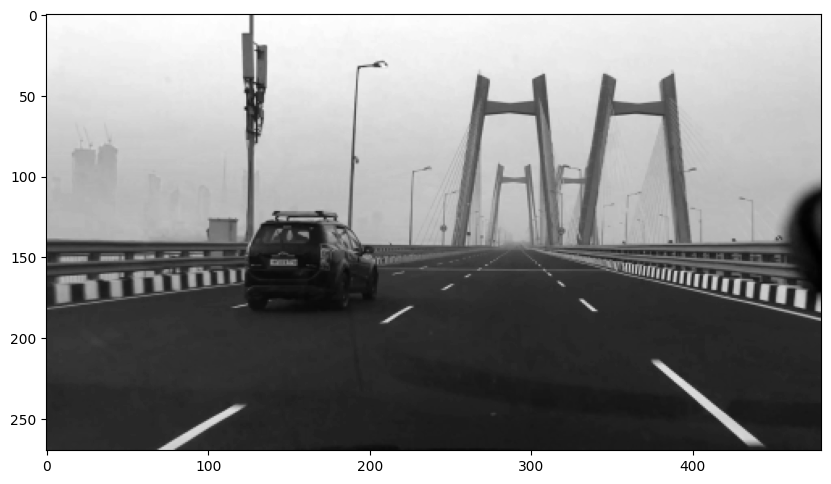

In [4]:
# specify frame index
idx = 230

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 1]], dtype=uint8)
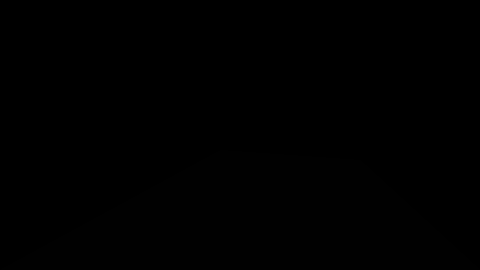

In [10]:
# create a zero array
stencil = np.zeros_like(col_images[idx][:,:,0])

# specify coordinates of the polygon
polygon = np.array([[0,270], [220,150], [360,160], [480,270]])

# fill polygon with ones
cv2.fillConvexPoly(stencil, polygon, 1)

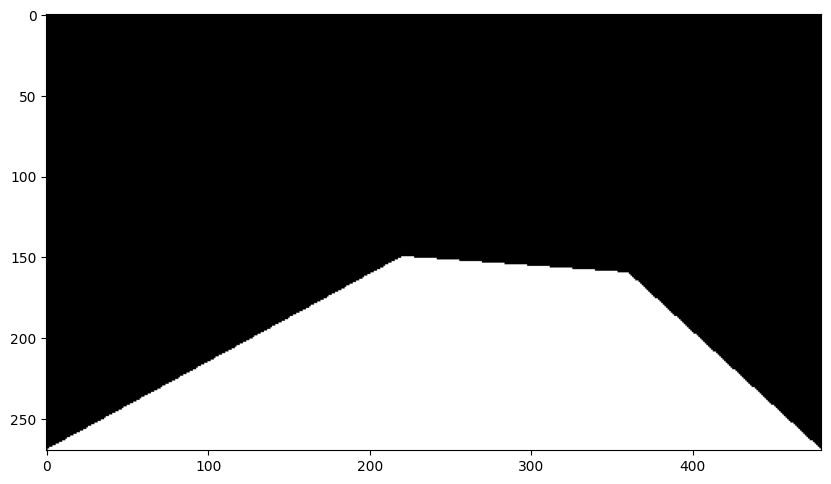

In [11]:
# plot polygon
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

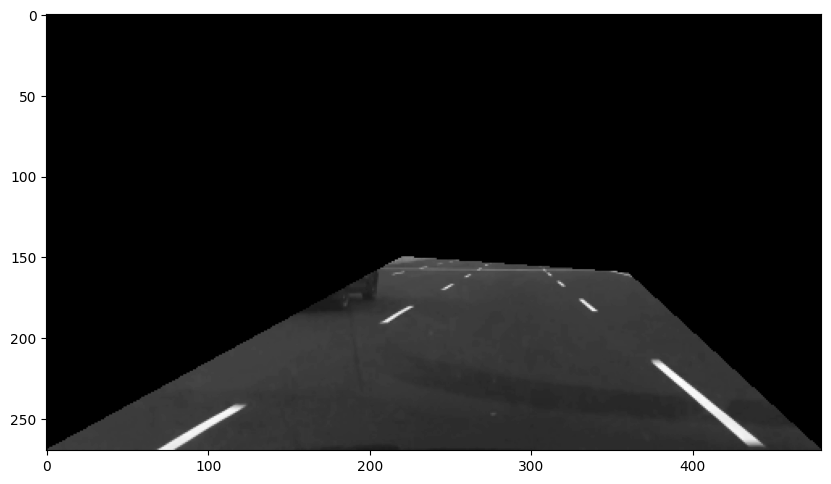

In [12]:
# apply polygon as a mask on the frame
img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

# 1. Image Thresholding

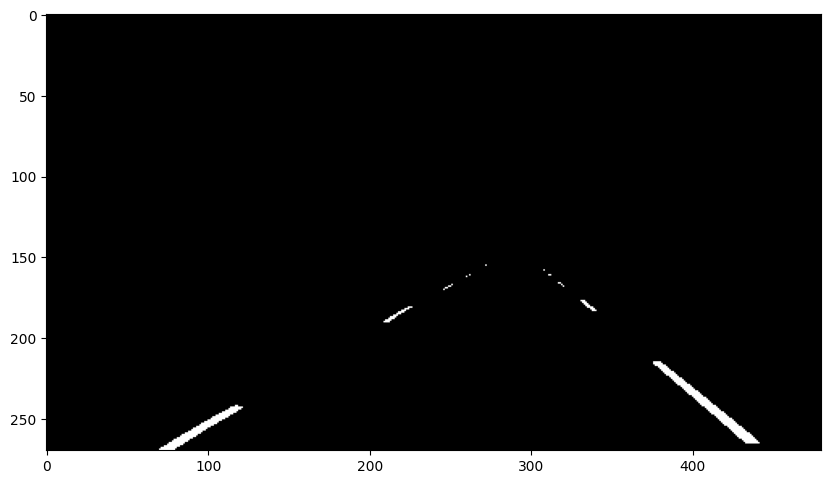

In [13]:
# apply image thresholding
ret, thresh = cv2.threshold(img, 130, 145, cv2.THRESH_BINARY)

# plot image
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()

# 2. Hough Line Transformation

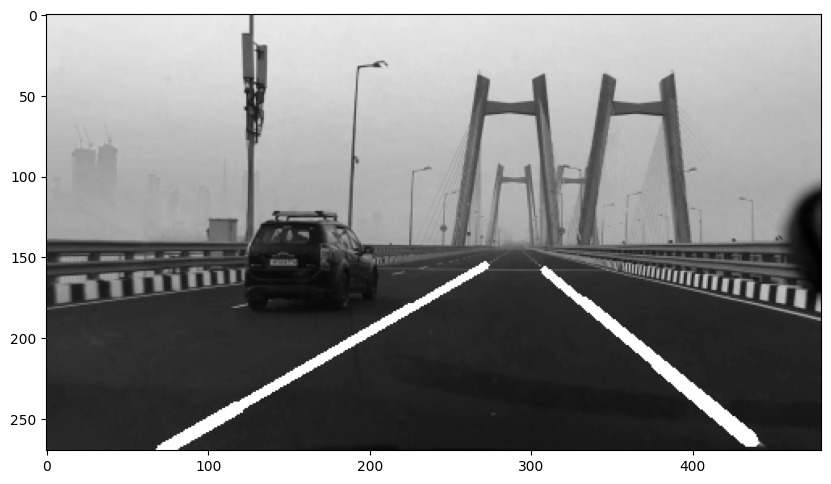

In [14]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)

# create a copy of the original frame
dmy = col_images[idx][:,:,0].copy()

# draw Hough lines
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(dmy, (x1, y1), (x2, y2), (255, 0, 0), 3)

# plot frame
plt.figure(figsize=(10,10))
plt.imshow(dmy, cmap= "gray")
plt.show()

In [15]:
cnt = 0

for img in tqdm_notebook(col_images):

  # apply frame mask
  masked = cv2.bitwise_and(img[:,:,0], img[:,:,0], mask=stencil)

  # apply image thresholding
  ret, thresh = cv2.threshold(masked, 130, 145, cv2.THRESH_BINARY)

  # apply Hough Line Transformation
  lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 30, maxLineGap=200)
  dmy = img.copy()

  # Plot detected lines
  try:
    for line in lines:
      x1, y1, x2, y2 = line[0]
      cv2.line(dmy, (x1, y1), (x2, y2), (0, 255, 0), 3)

    cv2.imwrite('/content/drive/MyDrive/Prerna_CVT_Project/detected/'+str(cnt)+'.png',dmy)

  except TypeError:
    cv2.imwrite('/content/drive/MyDrive/Prerna_CVT_Project/detected/'+str(cnt)+'.png',img)

  cnt+= 1

<ipython-input-15-e322d8af5801>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for img in tqdm_notebook(col_images):


  0%|          | 0/1108 [00:00<?, ?it/s]

In [16]:
# input frames path
pathIn= '/content/drive/MyDrive/Prerna_CVT_Project/detected/'

# output path to save the video
pathOut = '/content/drive/MyDrive/Prerna_CVT_Project/Basic.mp4'

# specify frames per second
fps = 30.0

In [17]:
from os.path import isfile, join

# get file names of the frames
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
files.sort(key=lambda f: int(re.sub('\D', '', f)))

In [18]:
frame_list = []

for i in tqdm_notebook(range(len(files))):
    filename=pathIn + files[i]
    #reading each files
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)

    #inserting the frames into an image array
    frame_list.append(img)

<ipython-input-18-1d2ff98c4d85>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(files))):


  0%|          | 0/1108 [00:00<?, ?it/s]

In [19]:
# write the video
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_list)):
    # writing to a image array
    out.write(frame_list[i])

out.release()